In [150]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [165]:
def making_df(n=100, p1=100, p2=30, p3=2):
    np.random.seed(n)

    p=np.random.randn(p1)*p2
    q=np.random.randn(p1)*p2
    
    w=p
    x=q-2*p3*q.max()
    
        
    r=p+p3*p.max()
    s=q-p3*q.max()
       

    df0 = pd.DataFrame({'feature1':w,
                       'feature2':x, 'label':[0]*len(r)})
    df1 = pd.DataFrame({'feature1':p,
                       'feature2':q, 'label':np.ones(len(p))})

    df2 = pd.DataFrame({'feature1':r,
                       'feature2':s, 'label':[-1]*len(r)})

    df = pd.concat([df0,df1,df2], axis=0)
    df = df.sample(n=len(df))
    df = df.reset_index(drop=True)
    return [df,p,q,r,s,w,x]

In [166]:
df,p,q,r,s,w,x = making_df()

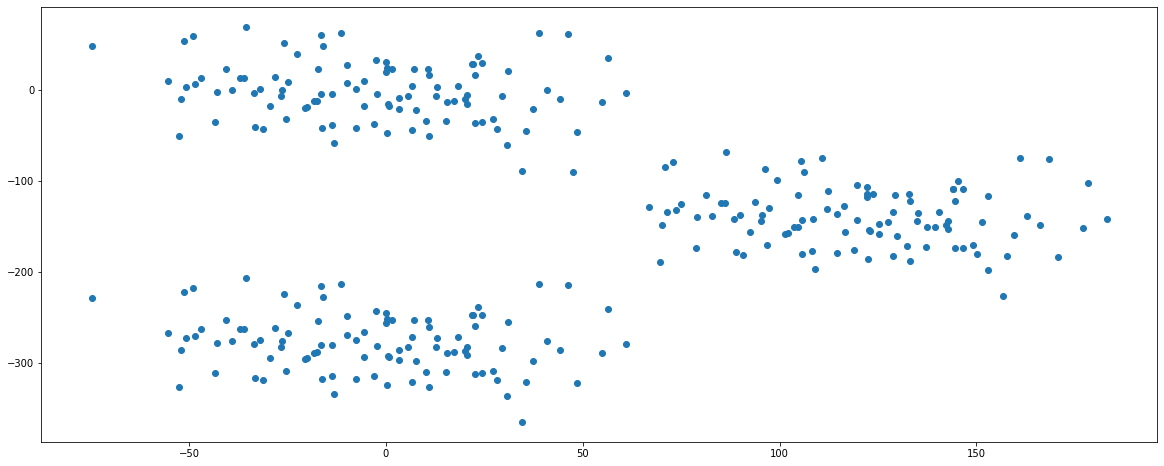

In [170]:
plt.figure(figsize=(20,8))
plt.scatter(df.feature1,df.feature2)
plt.show()

In [183]:
def clust(seeds):

    np.random.seed(seeds[0])
    a = np.random.randint(df.feature1.min(),df.feature1.max())
    b = np.random.randint(df.feature2.min(),df.feature2.max())

    np.random.seed(seeds[1])
    c = np.random.randint(df.feature1.min(),df.feature1.max())
    d = np.random.randint(df.feature2.min(),df.feature2.max())

    np.random.seed(seeds[2])
    e = np.random.randint(df.feature1.min(),df.feature1.max())
    f = np.random.randint(df.feature2.min(),df.feature2.max())
    
    plt.figure(figsize=(20,8))
    plt.scatter(df.feature1,df.feature2)
    plt.scatter(a,b, color='green', s=100)
    plt.scatter(c,d, color='orange', s=100)
    plt.scatter(e,f, color='red', s=100)
    plt.show()
    



    def euc(x1,x2,y1,y2):
        dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
        return dist
    



    for i in range(5):
        cluster1 = euc(a,df.feature1,b,df.feature2)
        cluster2 = euc(c,df.feature1,d,df.feature2)
        cluster3 = euc(e,df.feature1,f,df.feature2)


        cluster = pd.concat([cluster1,cluster2,cluster3], axis=1)
        cluster.columns=['cluster1','cluster2','cluster3']


        dic = {}
        for i in cluster.index:
            dic[i]=cluster.columns[np.argmin(cluster.iloc[i])]

        df['cluster'] = dic.values()

        
        plt.figure(figsize=(20,8))
        plt.scatter(a,b, color='green', s=100)
        plt.scatter(c,d, color='orange', s=100)
        plt.scatter(e,f, color='red', s=100)


        new = df[df.cluster=='cluster1']
        plt.scatter(new.feature1,new.feature2, color='green', s=20)
        a=new.feature1.mean()
        b=new.feature2.mean()

        new = df[df.cluster=='cluster2']
        plt.scatter(new.feature1,new.feature2, color='orange', s=20)
        c=new.feature1.mean()
        d=new.feature2.mean()

        new = df[df.cluster=='cluster3']
        plt.scatter(new.feature1,new.feature2, color='red', s=20)
        e=new.feature1.mean()
        f=new.feature2.mean()

        plt.show()

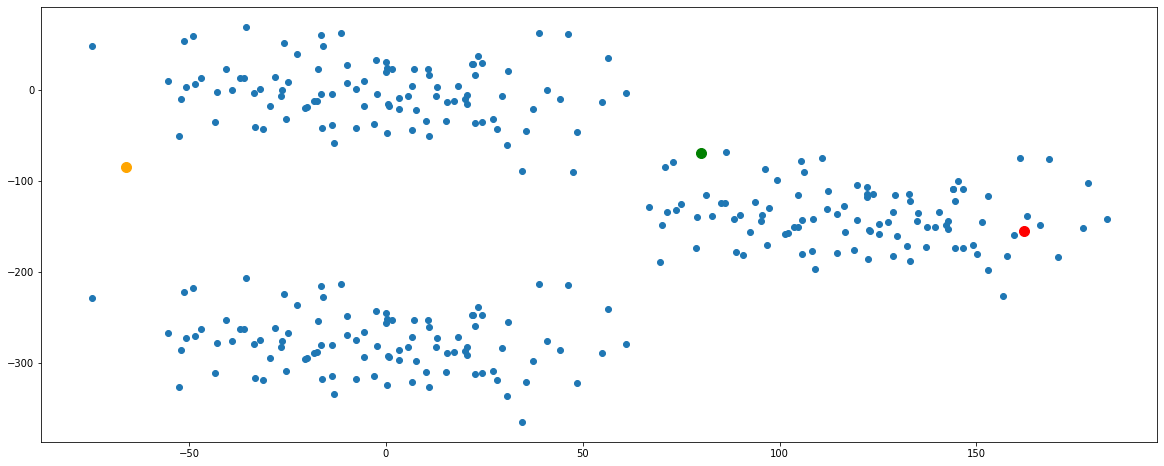

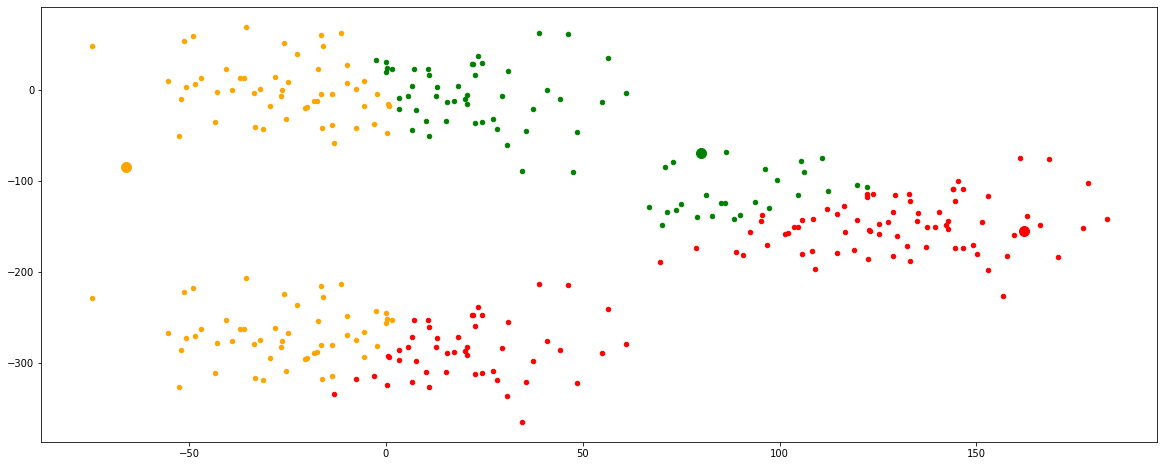

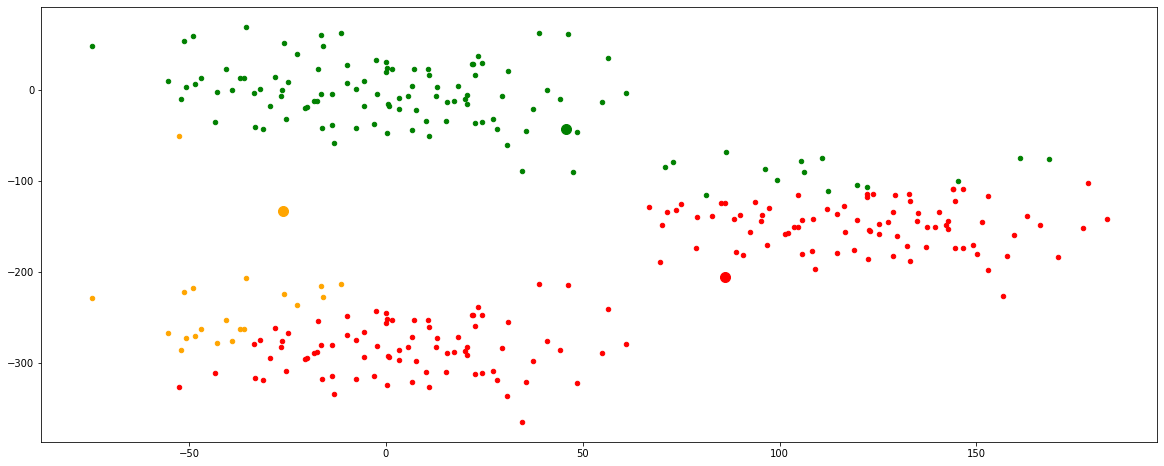

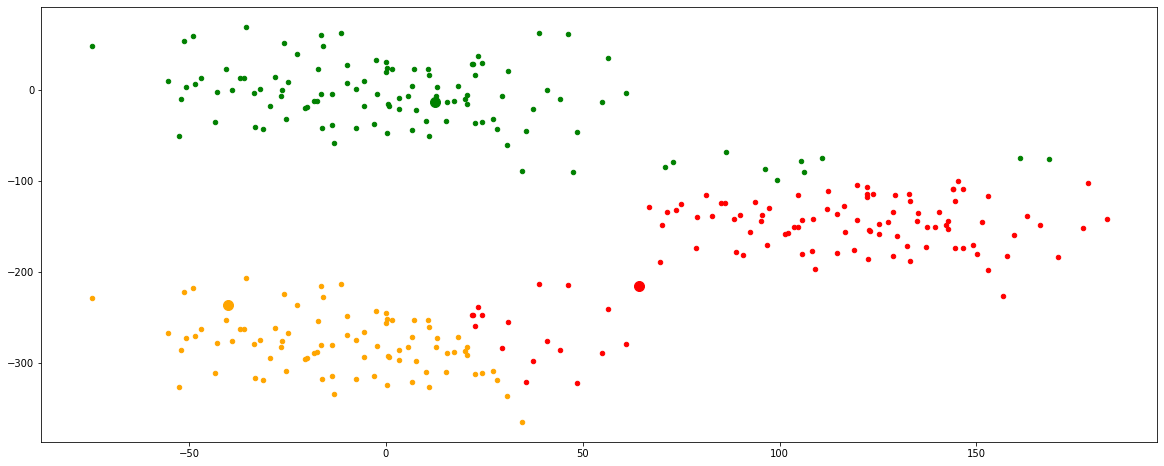

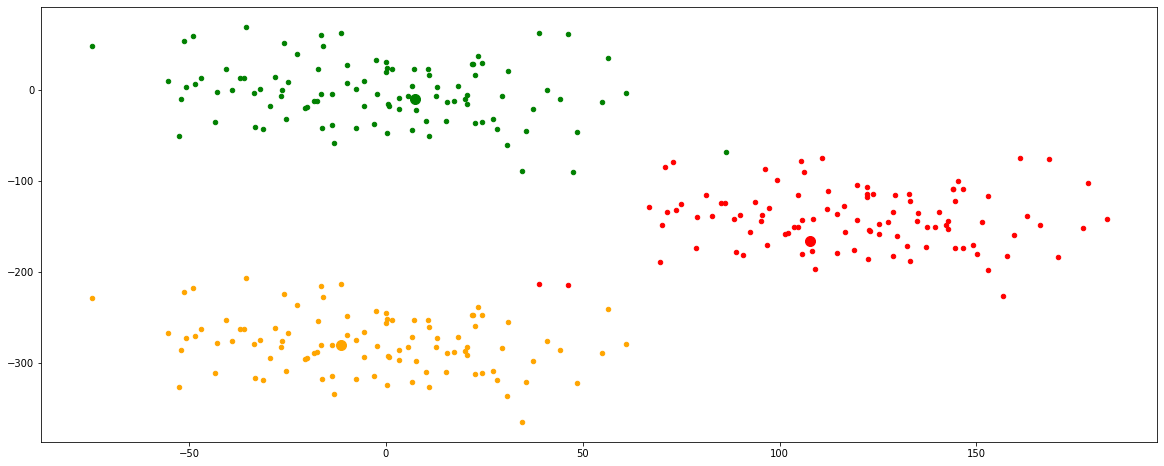

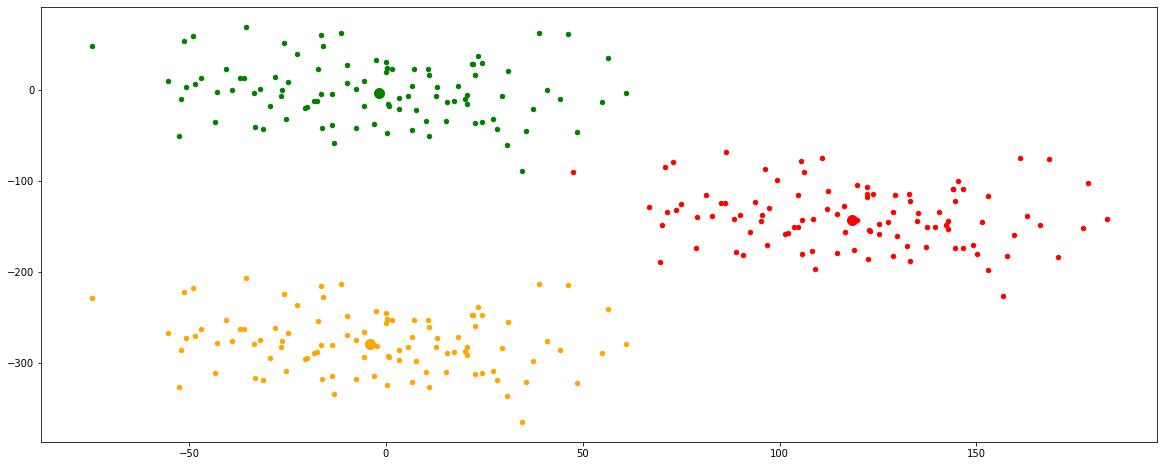

In [184]:
clust([55,100,8000])

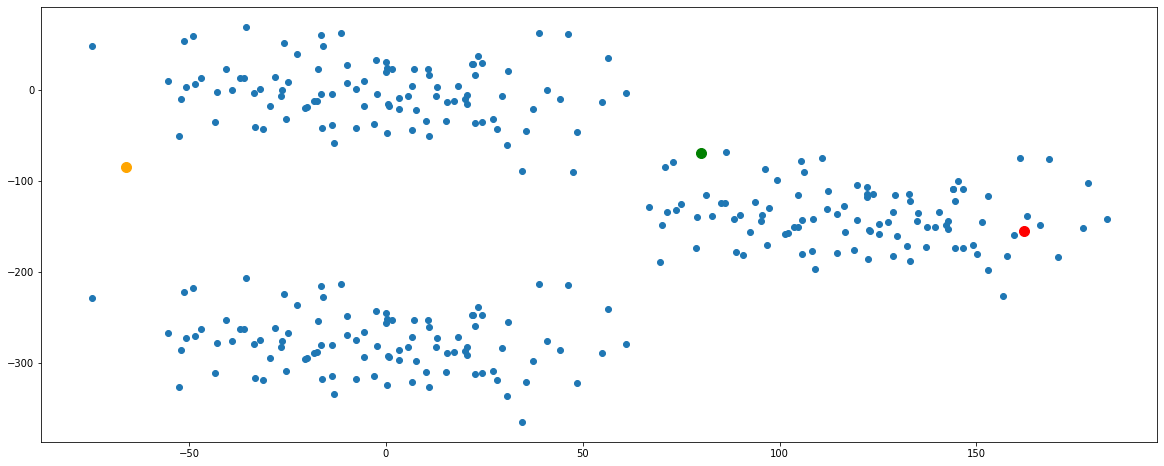

In [172]:
seeds = [55,100,8000]

np.random.seed(seeds[0])
a = np.random.randint(df.feature1.min(),df.feature1.max())
b = np.random.randint(df.feature2.min(),df.feature2.max())

np.random.seed(seeds[1])
c = np.random.randint(df.feature1.min(),df.feature1.max())
d = np.random.randint(df.feature2.min(),df.feature2.max())

np.random.seed(seeds[2])
e = np.random.randint(df.feature1.min(),df.feature1.max())
f = np.random.randint(df.feature2.min(),df.feature2.max())

plt.figure(figsize=(20,8))
plt.scatter(df.feature1,df.feature2)
plt.scatter(a,b, color='green', s=100)
plt.scatter(c,d, color='orange', s=100)
plt.scatter(e,f, color='red', s=100)
plt.show()

In [176]:
def euc(x1,x2,y1,y2):
    dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
    return dist

for i in range(5):
    cluster1 = euc(a,df.feature1,b,df.feature2)
    cluster2 = euc(c,df.feature1,d,df.feature2)
    cluster3 = euc(e,df.feature1,f,df.feature2)

    cluster = pd.concat([cluster1,cluster2,cluster3], axis=1)
    cluster.columns=['cluster1','cluster2','cluster3']
    

    
cluster

cluster1    cluster2    cluster3
0    247.762877  216.190448  230.999468
1    202.772776  183.666362  191.021450
2    103.254372  209.780487   32.737400
3     69.519972  132.980702  186.518025
4    113.122331  145.213109  229.358483
..          ...         ...         ...
295  200.257147  173.366845  195.823706
296   66.526576  100.921517  183.015303
297  145.753553  256.572739   30.393391
298  239.591164  223.001152  212.960565
299  135.666945  184.480416  245.414066

[300 rows x 3 columns]

In [177]:
dic = {}
for i in cluster.index:
    dic[i]=cluster.columns[np.argmin(cluster.iloc[i])]

df['cluster'] = dic.values()

df.head()

feature1    feature2  label   cluster
0  -20.676539 -296.386125    0.0  cluster2
1    0.090523 -256.363285    0.0  cluster2
2  129.726497 -160.491662   -1.0  cluster3
3   44.121416  -10.453768    1.0  cluster1
4   24.493620   28.568269    1.0  cluster1

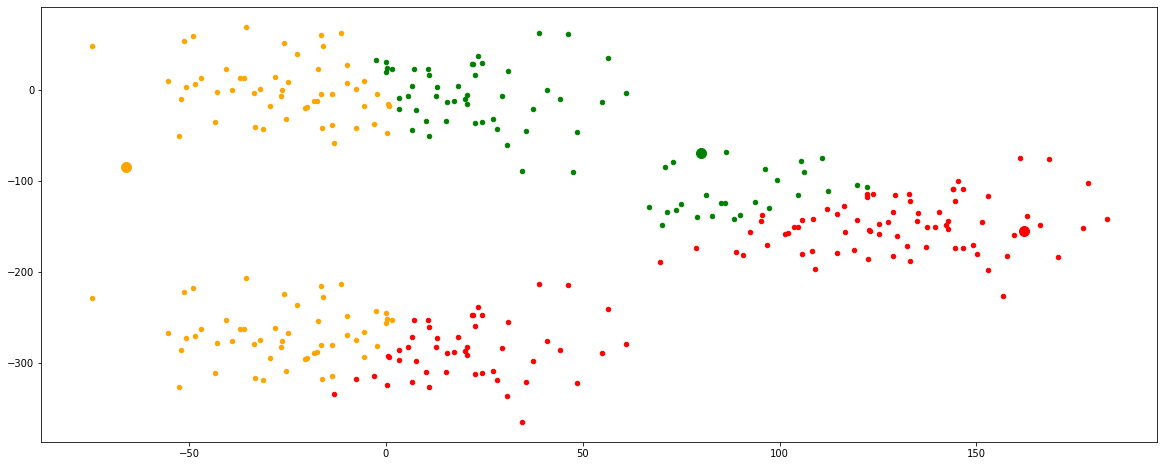

In [178]:
plt.figure(figsize=(20,8))
plt.scatter(a,b, color='green', s=100)
plt.scatter(c,d, color='orange', s=100)
plt.scatter(e,f, color='red', s=100)

new = df[df.cluster=='cluster1']
plt.scatter(new.feature1,new.feature2, color='green', s=20)

new = df[df.cluster=='cluster2']
plt.scatter(new.feature1,new.feature2, color='orange', s=20)

new = df[df.cluster=='cluster3']
plt.scatter(new.feature1,new.feature2, color='red', s=20)

plt.show()

In [179]:
new = df[df.cluster=='cluster1']
a=new.feature1.mean()
b=new.feature2.mean()

new = df[df.cluster=='cluster2']
c=new.feature1.mean()
d=new.feature2.mean()

new = df[df.cluster=='cluster3']
e=new.feature1.mean()
f=new.feature2.mean()

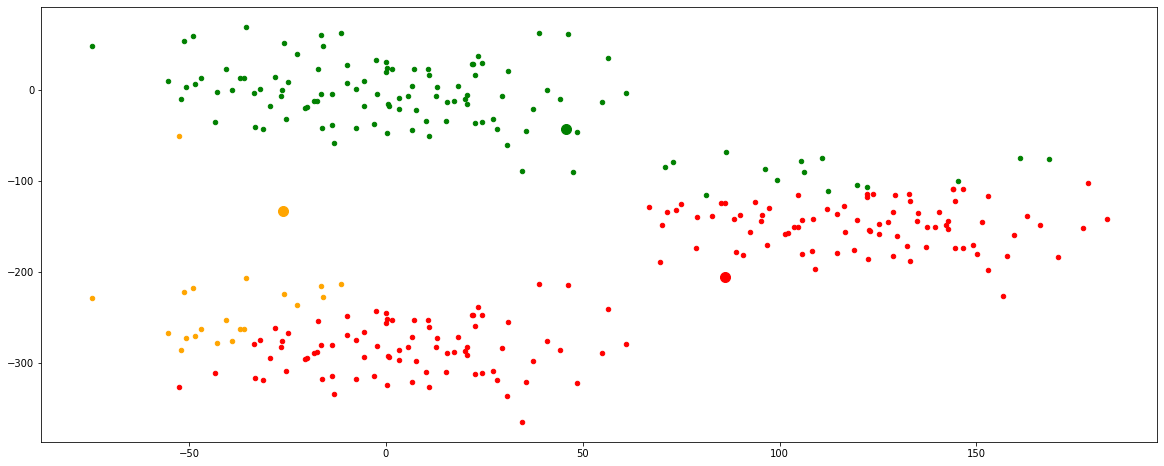

In [180]:
def euc(x1,x2,y1,y2):
    dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
    return dist

for i in range(5):
    cluster1 = euc(a,df.feature1,b,df.feature2)
    cluster2 = euc(c,df.feature1,d,df.feature2)
    cluster3 = euc(e,df.feature1,f,df.feature2)

    cluster = pd.concat([cluster1,cluster2,cluster3], axis=1)
    cluster.columns=['cluster1','cluster2','cluster3']
    


dic = {}
for i in cluster.index:
    dic[i]=cluster.columns[np.argmin(cluster.iloc[i])]

df['cluster'] = dic.values()





plt.figure(figsize=(20,8))
plt.scatter(a,b, color='green', s=100)
plt.scatter(c,d, color='orange', s=100)
plt.scatter(e,f, color='red', s=100)

new = df[df.cluster=='cluster1']
plt.scatter(new.feature1,new.feature2, color='green', s=20)

new = df[df.cluster=='cluster2']
plt.scatter(new.feature1,new.feature2, color='orange', s=20)

new = df[df.cluster=='cluster3']
plt.scatter(new.feature1,new.feature2, color='red', s=20)

plt.show()